# Image Processing SoSe 2024 - Assignment - 07

### Deadline is 13.06.2024 at 12:00 p.m.

#### Students: Vinzent Hannes Jörß, Minh Tuan Nguyen

Please solve the assignments together with a partner.

Make sure the code runs without errors, when clicking `Kernel` -> `Restart Kernel & Run All Cells`. Then save the notebook and upload your submission.

In [96]:
# display the plots inside the notebook
%matplotlib inline

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from skimage.data import chelsea
from skimage.color import rgb2gray
    
from numpy.fft import fft2 as numpy_fft2, ifft2 as numpy_ifft2

pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

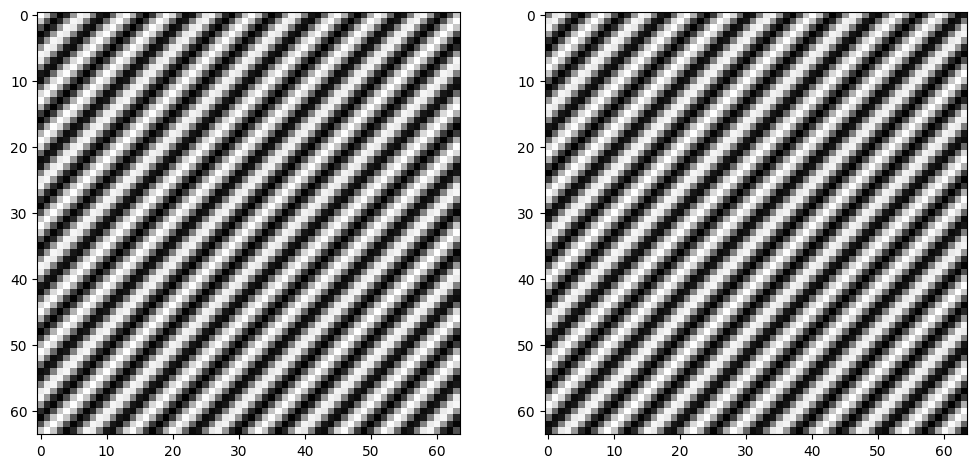

In [98]:
# Playground to get some intuition for 2d fourier transformation
ft = np.zeros((64,64))

# set some random coefficients and see what happens
ft[0, 1] = 1
ft[10, 10] = 100

plt.subplot(121)
plt.imshow(np.real(numpy_ifft2(ft)), cmap='gray')
plt.subplot(122)
plt.imshow(np.imag(numpy_ifft2(ft)), cmap='gray')
plt.show()

# Exercise 1 - 2D DFT - 2 Points
Implement the 2D Discrete Fourier Transformation with [Matrix Multiplication](https://en.wikipedia.org/wiki/DFT_matrix). You can use your code from the last assignment to compute the dft matrix.

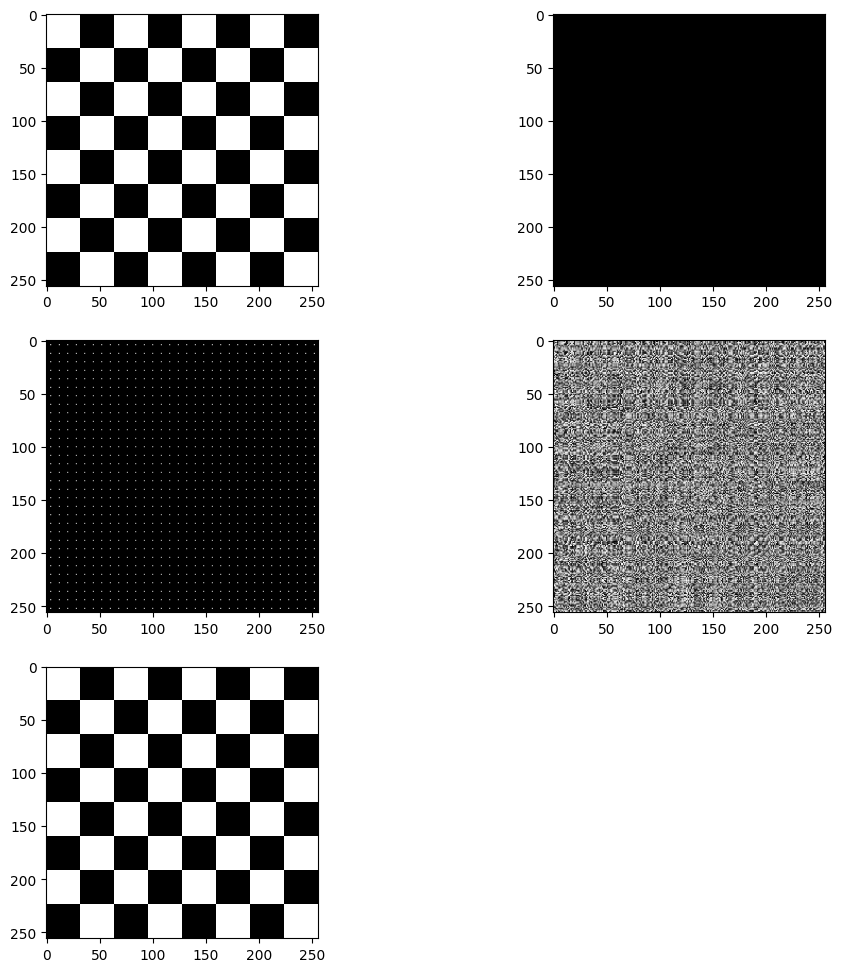

In [99]:
#my function from assignment 6 for 1d 
def dft_matrix(size = 7):
    """
    Returns the Discrete Fourier Transformation Matrix of order `n`.
    """
    # your code here
    n = np.arange(size)
    k = n.reshape((size, 1))
    matrix = np.exp(-2j * np.pi * k * n / size)
    return matrix

def idft_matrix(size = 7):
    n = np.arange(size)
    k = n.reshape((size, 1))
    matrix = np.exp(2j * np.pi * k * n / size) / size #divided by size to normalize
    return matrix

def dft2d(img):
    """
    Returns the 2d discrete fourier transformation
    """
    # your code here
    height, width = img.shape
    dft_matrix_height = dft_matrix(height)
    dft_matrix_width = dft_matrix(width)
    
    matrix_row_calculated = dft_matrix_height @ img
    
    dft_result = matrix_row_calculated @ dft_matrix_width.T
    return dft_result
    #return numpy_fft2(img) # only for testing, replace by your solution

def inv_dft2d(img):
    """
    Returns the 2d inverse discrete fourier transformation
    """
    # your code here
    height, width = img.shape
    idft_matrix_height = idft_matrix(height)
    idft_matrix_width = idft_matrix(width)
    
    intermediate = idft_matrix_height @ img
    
    idft_result = intermediate @ idft_matrix_width.T
    return idft_result
    #return numpy_ifft2(img) # only for testing, replace by your solution

def chess_board(n=8, field_size=32):
    board = np.zeros((n*field_size, n*field_size))
    s = field_size
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i*s:(i+1)*s, j*s:(j+1)*s] = 1
    return board

plt.subplot(321)
plt.imshow(np.real(chess_board()), cmap='gray')
plt.subplot(322)
plt.imshow(np.imag(chess_board()), cmap='gray')
plt.subplot(323)
plt.imshow(np.log10(1e-9 + np.abs(dft2d(chess_board()))), cmap='gray')
plt.subplot(324)
plt.imshow(np.arctan2(np.imag(dft2d(chess_board())), np.real(dft2d(chess_board()))), cmap='gray')
plt.subplot(325)
plt.imshow(np.real(inv_dft2d(dft2d(chess_board()))), cmap='gray')
plt.show()

# Exercise 2 - High and Low Pass filter with the 2D fourier transformation - 3 Points

In [100]:
def high_pass(img_ft, n):
    """Removes the low frequencies"""
    ft = img_ft.copy()
    ft[:n, :n] = 0
    ft[-n:, :n] = 0
    ft[-n:, -n:] = 0
    ft[:n, -n:] = 0
    return ft

def low_pass(img_ft, n):
    """Removes the high frequencies"""
    ft = img_ft.copy()
    # your code here
    height, width = ft.shape
    height_centered = height // 2
    width_centered = width // 2
    n_half = n // 2
    
    #shift the zero frequency to center
    ft_shifted = np.fft.fftshift(ft)
    
    lower_bound_height = height_centered - n_half
    upper_bound_height = height_centered + n_half
    lower_bound_width = width_centered - n_half
    upper_bound_width = width_centered + n_half
    
    # create mask with 0 for all signals to remove and 1 for all signals (signals to the threshold n) to keep
    mask = np.zeros_like(ft)
    mask[lower_bound_height:upper_bound_height, lower_bound_width:upper_bound_width] = 1
    ft_filtered = ft_shifted * mask

    #after filtering shift it back
    ft_filtered_final = np.fft.ifftshift(ft_filtered)
    
    return ft_filtered_final
    
def band_pass(img_ft, low, high):
    """Only preserve the frequencies between low and high"""
    # your code here
    ft = img_ft.copy()
    high_pass_filtered = high_pass(ft, low)
    bandpass_filtered = low_pass(high_pass_filtered, high)
    return bandpass_filtered
    
def inv_dft_and_plot(img_ft):
    plt.imshow(np.real(inv_dft2d(img_ft)), cmap='gray', vmin=0, vmax=1)
    plt.show()

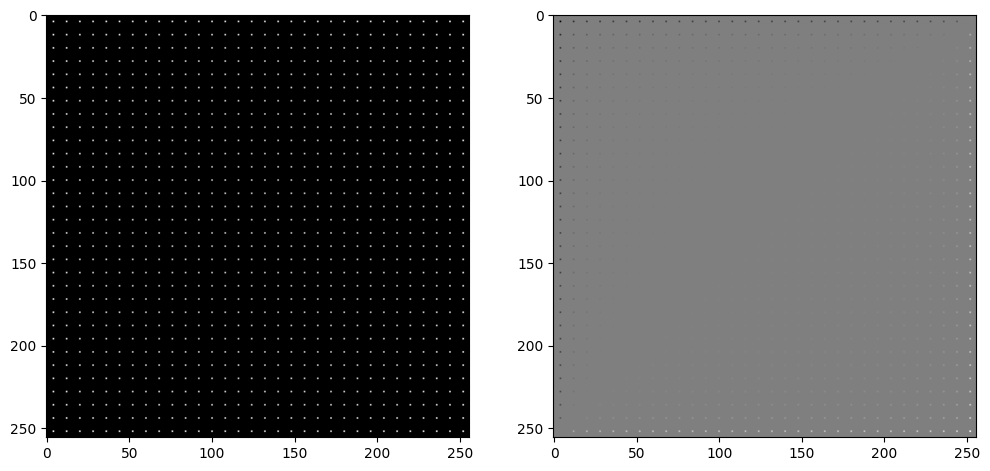

In [101]:
chess_board_ft = dft2d(chess_board())

# display frequency domain of the chess_board
plt.subplot(121)
plt.imshow(np.log10(1e-9+np.abs(np.abs(chess_board_ft))), cmap='gray')
plt.subplot(122)
plt.imshow(np.imag(chess_board_ft), cmap='gray')
plt.show()

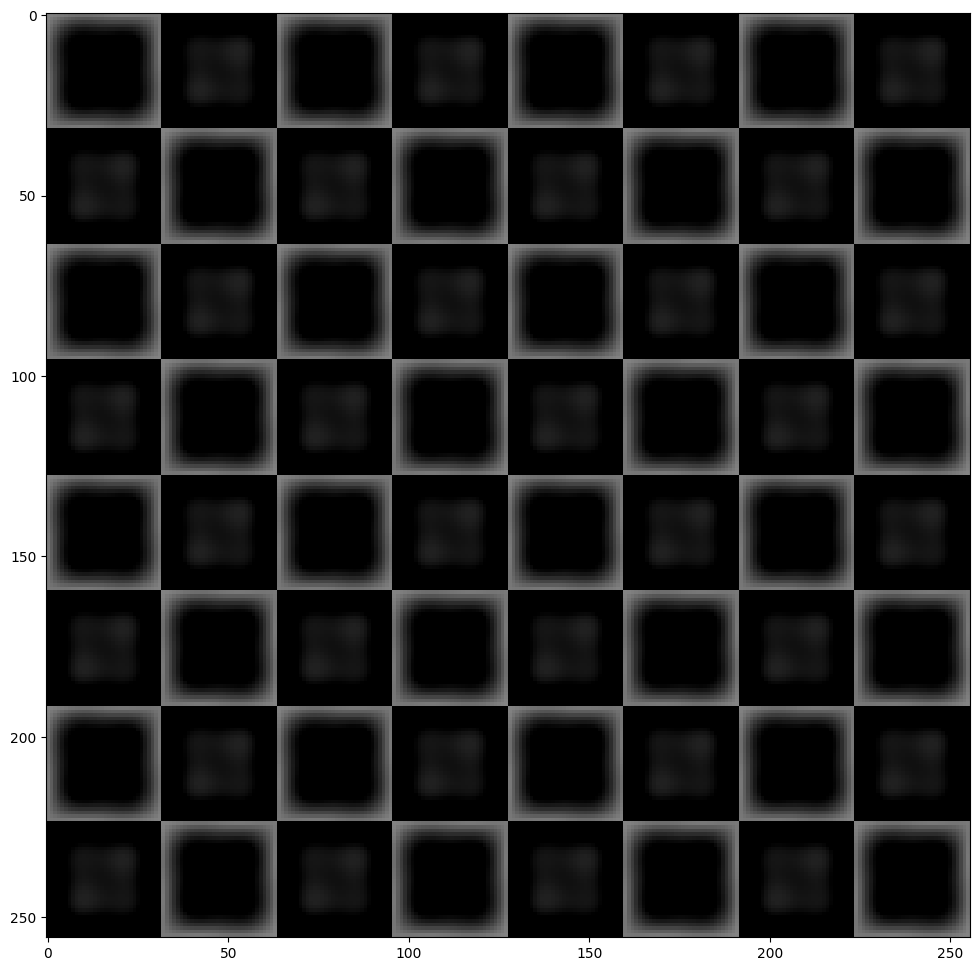

In [102]:
# remove the low frequencies of the chess board
chess_high_feq = high_pass(chess_board_ft, 12)
inv_dft_and_plot(chess_high_feq)

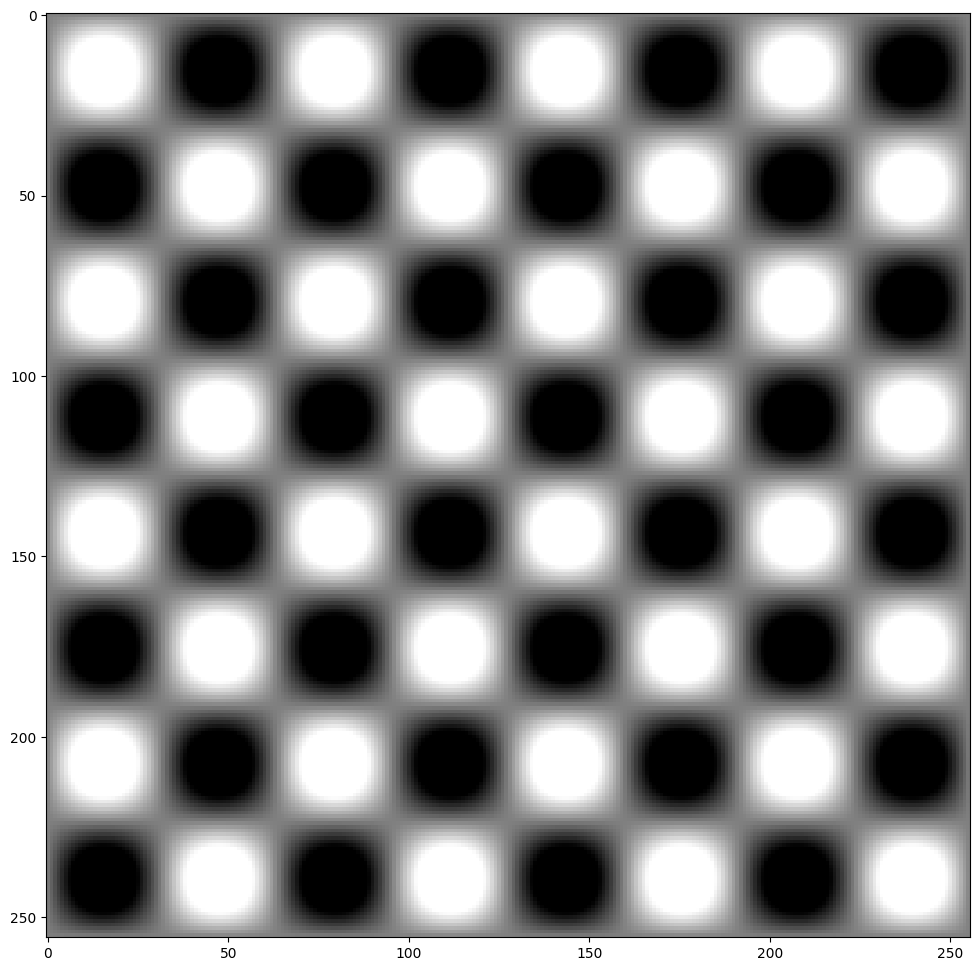

In [103]:
# remove the high frequencies of the chess board
chess_low_feq = low_pass(chess_board_ft, 10)
inv_dft_and_plot(chess_low_feq)

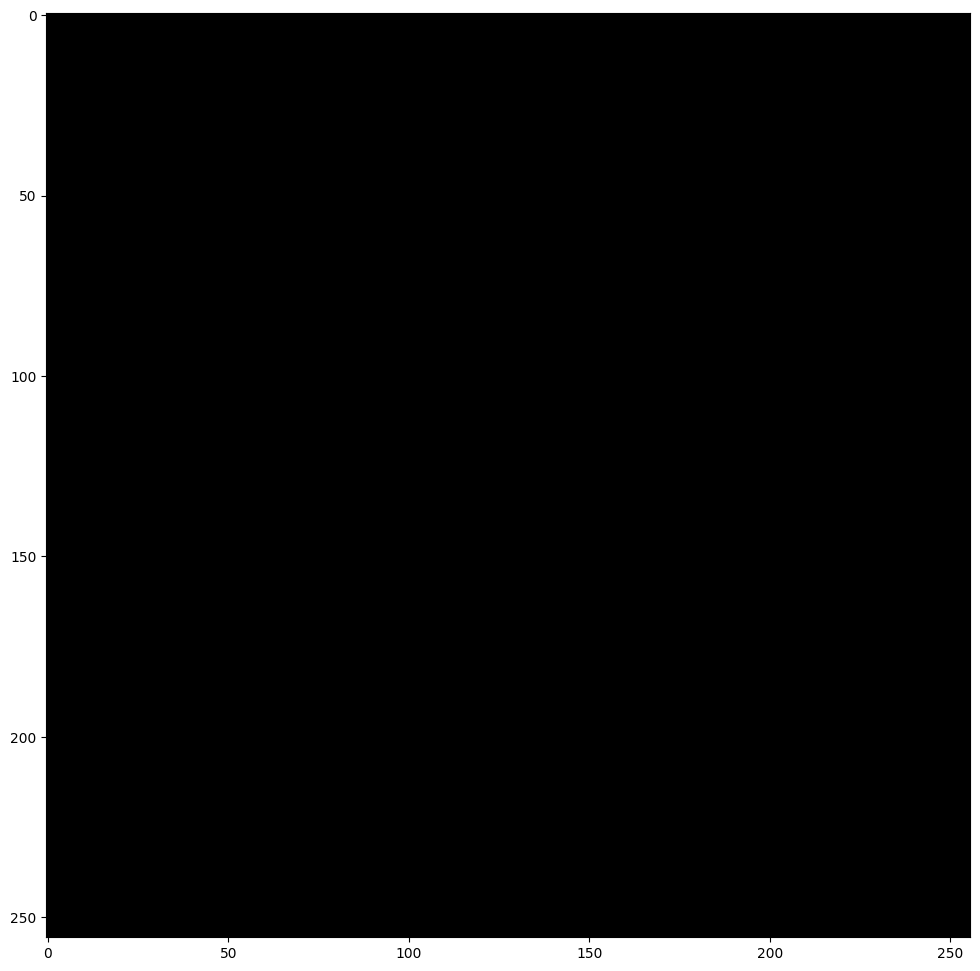

In [104]:
# remove the high frequencies of the chess board
chess_medium_feq = band_pass(chess_board_ft, 5, 15)
inv_dft_and_plot(chess_medium_feq)

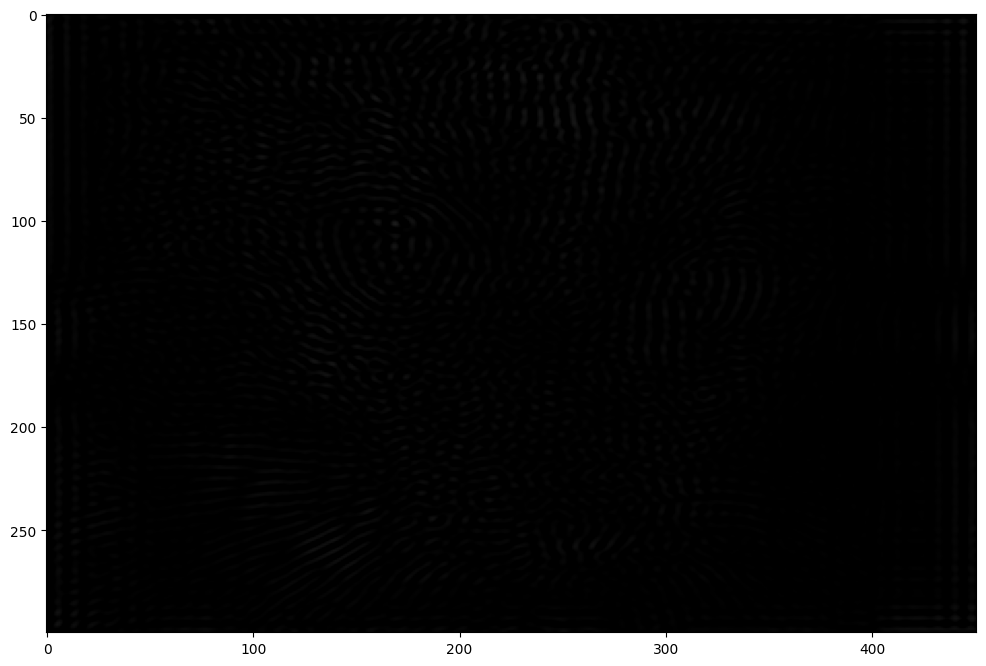

In [105]:
img = rgb2gray(chelsea() / 255)
# filter all frequencies corresponding to the coefficients between 48 and 128.
# your code here
img_filtered_band = band_pass(dft2d(img),48, 128)

inv_dft_and_plot(img_filtered_band)

# Exercise 3 - FFT - 5 Points

Implement the fast fourier transformation. 
Use the [Cooley-Tukey](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm) algorithm.

In [106]:
#breakdown the 1d big problem into half sized problems to calculate
#that is why it has to be padded so filled up with zeros until the next power of 2
def fft_1d(x):
    len_of_array = len(x)
    if len_of_array <= 1:
        return x
    #split array into even and odd to split the problem size and call the function recursively on that
    even = fft_1d(x[0::2])
    odd = fft_1d(x[1::2])
    T = [np.exp(-2j * np.pi * k / len_of_array) * odd[k % (len_of_array // 2)] for k in range(len_of_array)]
    return [even[k] + T[k] for k in range(len_of_array // 2)] + [even[k] - T[k] for k in range(len_of_array // 2)]

def next_power_of_2(x):
    return 1 if x == 0 else 2**(x - 1).bit_length()

def pad_to_power_of_2(image):
    count_rows, count_columns = image.shape
    
    #filled rows and columns
    new_rows = next_power_of_2(count_rows)
    new_cols = next_power_of_2(count_columns)
    padded_image = np.zeros((new_rows, new_cols), dtype=image.dtype)
    padded_image[:count_rows, :count_columns] = image
    return padded_image

def unpad_to_reference(image, ref_image):
    height, width = image.shape
    ref_height, ref_width = ref_image.shape
    if height < ref_height or width < ref_width:
        raise ValueError("The padded image is smaller than the reference image in one or both dimensions.")
    
    unpadded_image = image[:ref_height, :ref_width]
    return unpadded_image
    

def fft(x):
    """
    Computes the fast fourier transformation of x.
    """
    # your code here
    #add zeros to the 2d array to get to size of power of 2
    x_padded = pad_to_power_of_2(x)
    
    # apply fft to each row of the padded image
    image_row_transformed = np.array([fft_1d(row) for row in x_padded])
    # apply fft to each column of the row-calculated matrix
    fft_matrix = np.array([fft_1d(col) for col in image_row_transformed.T]).T
    
    return fft_matrix
    #return numpy_fft2(x)


In [107]:
img = rgb2gray(chelsea() / 255.)
fft_img = fft(img)

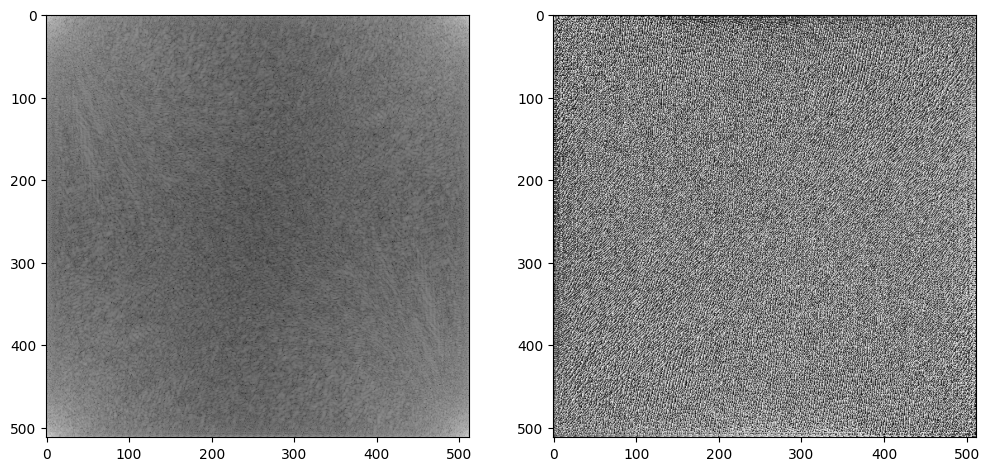

In [108]:
plt.subplot(121)

plt.imshow(np.log10(1e-9 + np.abs(fft_img)), cmap='gray')
plt.subplot(122)
plt.imshow(np.arctan2(np.imag(fft_img), np.real(fft_img)), cmap='gray')
plt.show()

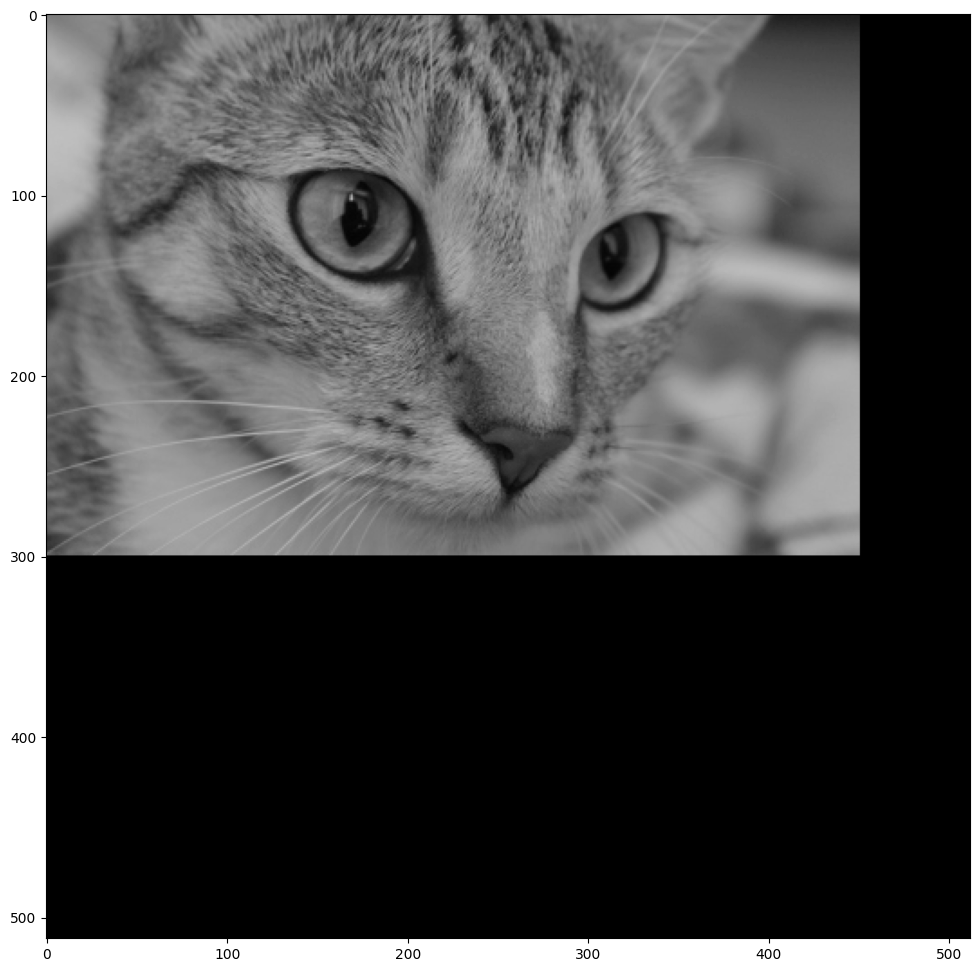

In [109]:
plt.imshow(np.real(inv_dft2d(fft_img)),cmap="gray", vmin=0, vmax=1)
#plt.imshow(unpad_to_reference(np.real(inv_dft2d(fft_img)),chelsea()), cmap="gray", vmin=0, vmax=1)
#plt.imshow(np.real(unpad_to_reference(inv_dft2d(fft_img), chelsea())), cmap="gray", vmin=0, vmax=1)
plt.show()